In [2]:
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import tensorflow as tf

print("Number of available GPUs:", len(tf.config.list_physical_devices('GPU')))


Number of available GPUs: 0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/df_heartbeats.csv')
df = df.drop(columns=['Unnamed: 0'])
df['y'] = df['y'].astype(int)

df_id = df['id']
df = df.drop(columns='id', axis=1)


In [ ]:
df.head()

,y,0,1,2,3,4,5,6,7,8,...,170,171,172,173,174,175,176,177,178,179
0,0,-4.0,-7.0,-6.0,-3.0,2.0,9.0,22.0,45.0,68.0,...,-70.0,-73.0,-76.0,-79.0,-82.0,-85.0,-87.0,-88.0,-88.0,-89.0
1,0,16.0,21.0,26.0,32.0,37.0,40.0,38.0,36.0,34.0,...,-38.0,-39.0,-40.0,-40.0,-41.0,-41.0,-40.0,-40.0,-39.0,-37.0
2,0,-42.0,-37.0,-31.0,-23.0,-12.0,-5.0,0.0,5.0,9.0,...,-21.0,-22.0,-22.0,-23.0,-25.0,-27.0,-27.0,-26.0,-23.0,-20.0
3,0,9.0,24.0,40.0,50.0,54.0,56.0,58.0,60.0,62.0,...,-12.0,-12.0,-12.0,-12.0,-12.0,-10.0,-6.0,-2.0,1.0,7.0
4,0,-56.0,-55.0,-53.0,-51.0,-49.0,-47.0,-44.0,-40.0,-38.0,...,-49.0,-48.0,-46.0,-44.0,-42.0,-40.0,-38.0,-36.0,-33.0,-31.0


In [ ]:
df['y'].value_counts()

0    100287
2     54413
1     18676
3      4573
Name: y, dtype: int64

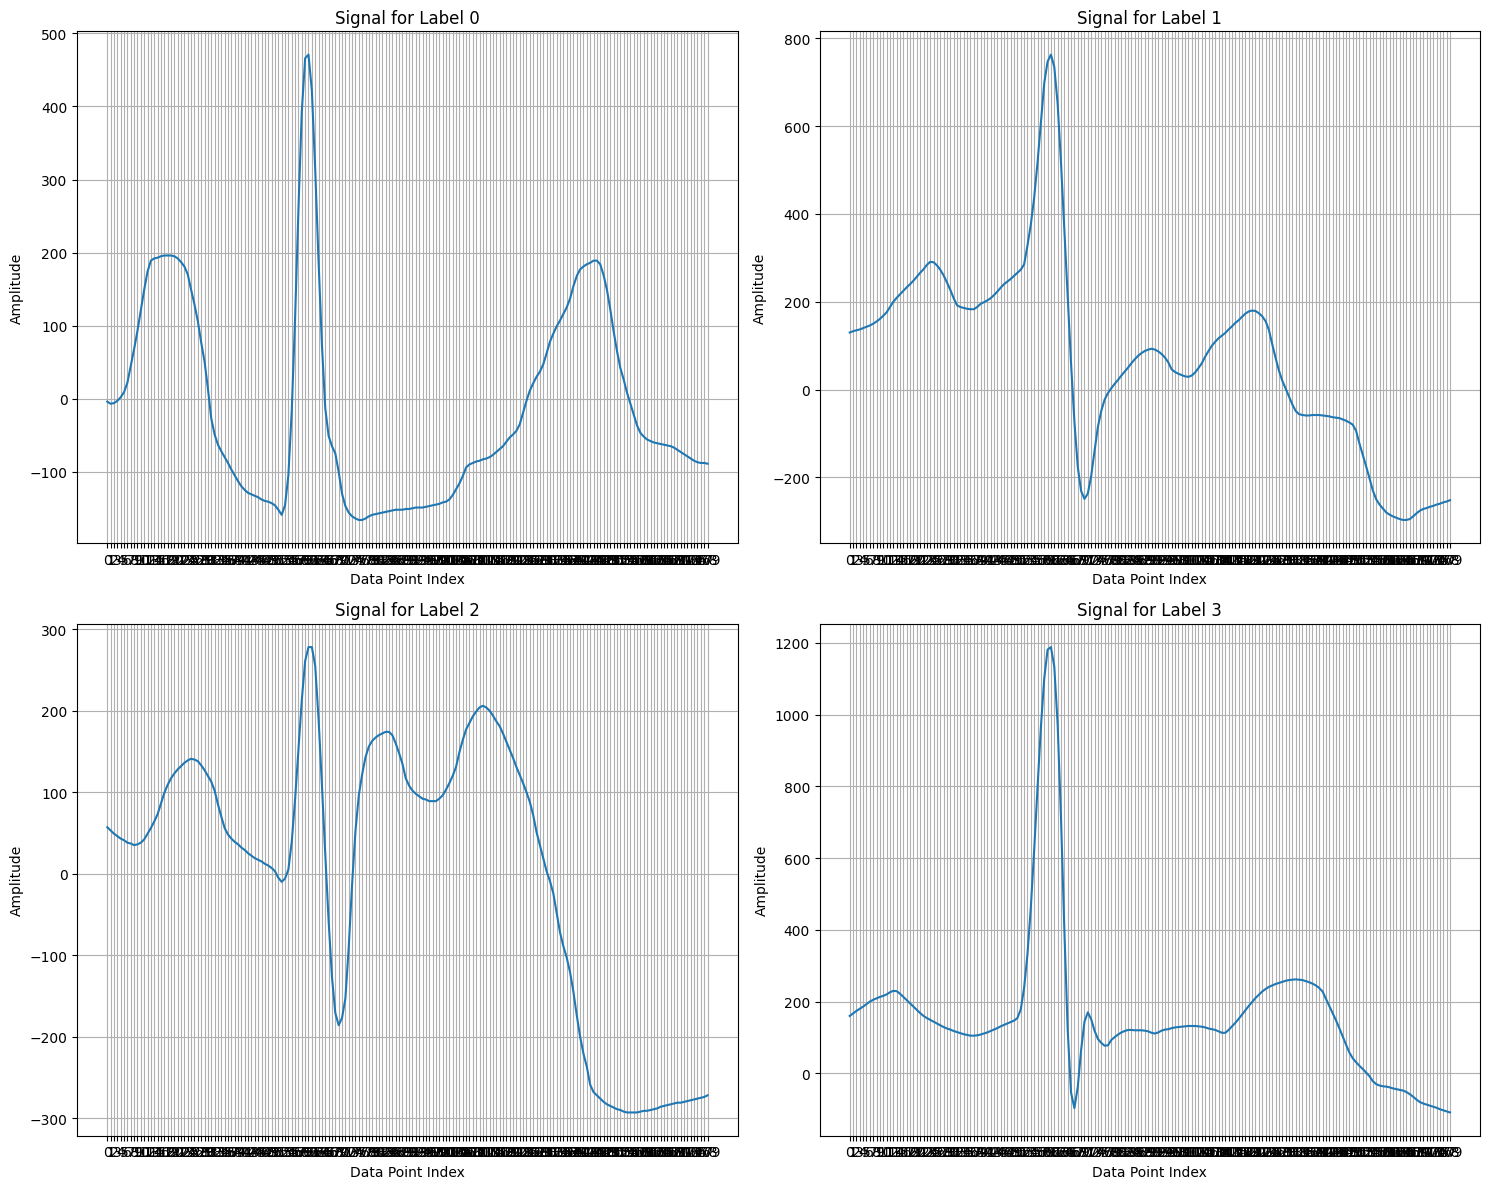

In [ ]:
import matplotlib.pyplot as plt

# Plot 4 signals, one for each class, in one big figure
labels_to_plot = df['y'].unique()

plt.figure(figsize=(15, 12))

for i, label in enumerate(labels_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    label_data = df[df['y'] == label].drop(['y'], axis=1).iloc[0]
    plt.plot(label_data)
    plt.title(f'Signal for Label {label}')
    plt.xlabel('Data Point Index')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


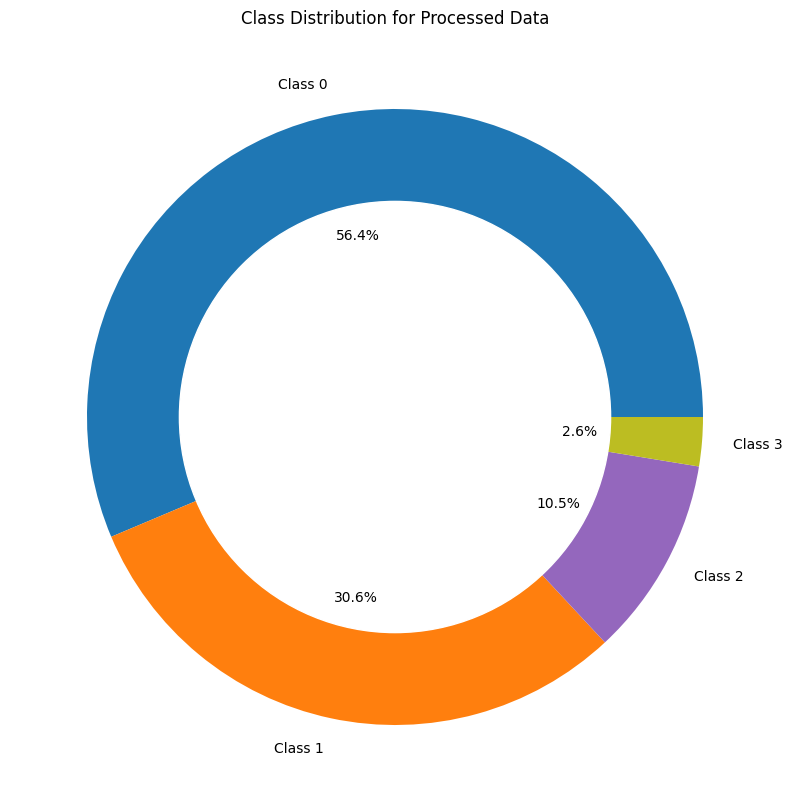

In [ ]:

# representation of classes % wise
per_class_processed = df['y'].value_counts()
plt.figure(figsize=(20, 10))
my_circle_processed = plt.Circle((0, 0), 0.7, color='white')
plt.pie(per_class_processed, labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
        colors=['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive'], autopct='%1.1f%%')
p_processed = plt.gcf()
p_processed.gca().add_artist(my_circle_processed)
plt.title('Class Distribution for Processed Data')
plt.show()



## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split


df = pd.concat([df_id,df], axis=1)
X = df.drop('y', axis=1)
y = df['y']

# Splitting the data into training (80%) and temporary (20%)
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the train and test splits into dataframes
df_train = pd.DataFrame(df_train, columns=X.columns)
df_test = pd.DataFrame(df_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])


In [ ]:
df_train = pd.concat([df_train, y_train], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train = df_train.drop(columns='id', axis=1)
df_test_id = df_test['id']
df_test = df_test.drop(columns='id', axis=1)

## Preprocessing

In [ ]:
'''
# Resampling

from sklearn.utils import resample

df_1 = df_train[df_train['y'] == 1]
df_2 = df_train[df_train['y'] == 2]
df_3 = df_train[df_train['y'] == 3]
df_0 = df_train[df_train['y'] == 0].sample(n=5000, random_state=42)

df_1_upsample = resample(df_1, replace=True, n_samples=5000, random_state=123)
df_2_upsample = resample(df_2, replace=True, n_samples=5000, random_state=124)
df_3_upsample = resample(df_3, replace=True, n_samples=5000, random_state=125)

df_train = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample])
'''

"\n# Resampling\n\nfrom sklearn.utils import resample\n\ndf_1 = df_train[df_train['y'] == 1]\ndf_2 = df_train[df_train['y'] == 2]\ndf_3 = df_train[df_train['y'] == 3]\ndf_0 = df_train[df_train['y'] == 0].sample(n=5000, random_state=42)\n\ndf_1_upsample = resample(df_1, replace=True, n_samples=5000, random_state=123)\ndf_2_upsample = resample(df_2, replace=True, n_samples=5000, random_state=124)\ndf_3_upsample = resample(df_3, replace=True, n_samples=5000, random_state=125)\n\ndf_train = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample])\n"

In [ ]:
# Calculate class weights to counter class imbalance
y_train = df_train['y']
total = y_train.shape[0]
class_counts = y_train.value_counts()
class_weights = {class_label: (1 / count) * (total / 4.0) for class_label, count in class_counts.items()}
print(class_weights)


{0: 0.4435965349619843, 2: 0.8175913163335631, 1: 2.3820192758182186, 3: 9.729291962821213}


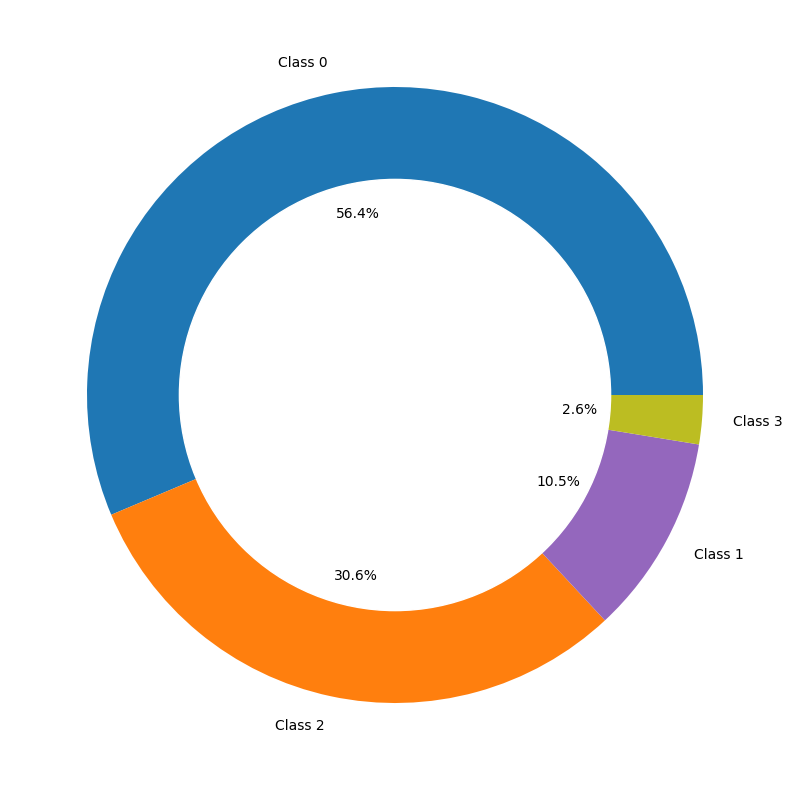

In [ ]:
# representation of classes % wise
per_class = df_train['y'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['Class 0','Class 2','Class 1','Class 3'], colors=['tab:blue','tab:orange','tab:purple','tab:olive'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



In [ ]:
# Pre Trearment (noise)
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,df_train.shape[1]-1)
    return (signal+noise)

In [ ]:
classes=df_train.groupby('y',group_keys=False).apply(lambda df_train : df_train.sample(1))
tempo=classes.iloc[0,:df_train.shape[1]-1]
bruiter=add_gaussian_noise(tempo)

In [ ]:
from keras.utils import to_categorical

target_train=df_train['y']
target_test=df_test['y']
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=df_train.iloc[:,:df_train.shape[1]-1].values
X_test=df_test.iloc[:,:df_test.shape[1]-1].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

def create_1d_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))


    # Specify your filter, kernel, and blocks
    filters = 128
    kernel_size = 10
    blocks = 3

    # Add convolutional blocks
    for _ in range(blocks):
        model.add(Conv1D(filters, kernel_size, activation='relu', input_shape=input_shape))
        model.add(Conv1D(filters, kernel_size, activation='relu'))
        model.add(MaxPooling1D(2))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
def train_and_predict_1d_cnn(model, X_train, y_train):
    if len(y_train.shape) > 1:
        y_train = np.argmax(y_train, axis=1)

    batch_size = 512
    epochs = 500
    validation_split = 0.2

    callbacks = [EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        callbacks=callbacks, validation_split=validation_split, class_weight=class_weights)

    model.load_weights('best_model.h5')

    return model, history

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

input_shape = (X_train.shape[1], 1)
num_classes = 4

cnn_model = create_1d_cnn(input_shape, num_classes)
model,history = train_and_predict_1d_cnn(cnn_model, X_train, y_train)

Epoch 1/500
 28/223 [==>...........................] - ETA: 14:11 - loss: 1.5198 - accuracy: 0.3186

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

# Calculate micro-averaged F1 score
y_true_micro = np.argmax(y_test, axis=1)
y_pred_micro = np.argmax(y_pred, axis=1)
f1_micro = f1_score(y_true_micro, y_pred_micro, average='micro')
print("f1 score:", f1_micro)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true_micro))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
disp.ax_.set_title('Confusion Matrix')
plt.show()



# Calculate aggregated true scores
df_y_test_pred = pd.DataFrame({'id': df_test_id, 'y': y_pred_micro}, dtype=int)

df_ecg_pred_test = df_y_test_pred.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()

y_true_aggr = np.zeros(len(df_ecg_pred_test))

for index, row in df_ecg_pred_test.iterrows():
    ecg_id = row['id']
    ecg_labels = y_test[df_test_id == ecg_id].argmax(axis=1)

    ecg_label = np.argmax(np.bincount(ecg_labels))

    y_true_aggr[index] = ecg_label


f1_aggr = f1_score(y_true_aggr, df_ecg_pred_test['y'], average='micro')
print('F1-score aggregated:', f1_aggr)

cm_aggr = confusion_matrix(y_true_aggr, df_ecg_pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aggr, display_labels=np.unique(y_true_aggr))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
disp.ax_.set_title('Confusion Matrix Aggregated')
plt.show()


## Create X_test file

In [ ]:

df_true_test = pd.read_csv('/content/drive/MyDrive/data/X_test_heartbeats.csv')
df_true_test_ids = df_true_test['id']
df_true_test = df_true_test.drop(columns=['Unnamed: 0','id'], axis=1)


X_true_test = df_true_test.values.reshape(len(df_true_test), df_true_test.shape[1], 1)

y_true_test_pred = model.predict(X_true_test)

predicted_classes = np.argmax(y_true_test_pred, axis=1)

df_y_pred_true_test = pd.DataFrame({'id': df_true_test_ids, 'y': predicted_classes}, dtype=int)

# Majority vote to get ECG class
df_ecg_predictions = df_y_pred_true_test.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()

df_ecg_predictions.to_csv('/content/drive/MyDrive/data/ecg_predictions.csv', index=False)


In [ ]:
#df_ecg_predictions.shape

In [ ]:
#df_X_test = pd.read_csv('/content/drive/MyDrive/data/X_test.csv')
#df_X_test.shape